<font size=15> Preprocessing Of Iris Images

In [ ]:
import cv2
import numpy as np
import glob
import math
from scipy.spatial import distance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

## Reading Image

In [2]:
img = cv2.imread('C:/Users/naray/OneDrive/Desktop/mini project/iris1.jpg',0)

In [3]:
pic=cv2.imread('C:/Users/naray/OneDrive/Desktop/mini project/iris2.jfif',0)

In [4]:
print(img)

[[ 74  78  79 ...  15  22  35]
 [ 80  84  86 ...   6  21  39]
 [ 72  79  84 ...  20  39  61]
 ...
 [184 179 179 ... 174 166 160]
 [172 170 176 ... 176 167 159]
 [173 177 180 ... 177 171 167]]


In [5]:
print(pic)

[[197 198 195 ... 221 221 221]
 [195 195 193 ... 221 221 221]
 [171 171 188 ... 221 221 221]
 ...
 [117 201 145 ... 221 221 222]
 [197 194 186 ... 225 225 226]
 [210 163 208 ... 227 228 228]]


## Image Resizing

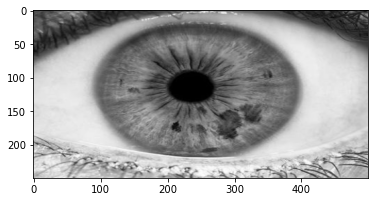

In [8]:
width,height=500,250
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgresize=cv2.resize(img,(width,height))
plt.imshow(imgresize)

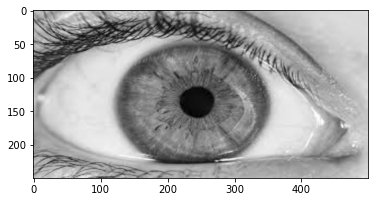

In [6]:
width,height=500,250
pic=cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)
picresize=cv2.resize(pic,(width,height))
plt.imshow(picresize)

In [9]:
imgresize.shape

(250, 500, 3)

In [10]:
picresize.shape

(250, 500, 3)

##  Iris Segmentation

In [11]:
def spatial(f,dx,dy):
    sfilter=np.zeros((8,8))
    for i in range(8):
        for j in range(8):
            sfilter[i,j]=gabor((-4+j),(-4+i),dx,dy,f)
    return sfilter

In [12]:
def gabor(x, y, dx, dy, f):
    gb = (1/(2*math.pi*dx*dy))*np.exp(-0.5*(x**2 / dx**2 + y**2 / dy**2)) * m(x, y, f)
    return gb

In [13]:
def m(x ,y, f):
    val = np.cos(2*np.pi*f*math.sqrt(x **2 + y**2))
    return val

## Feature Extraction

In [14]:
feature_vec=[]
for i in range(6):
    for j in range(64):
                #Run 8 by 8 filtered block iteratively over the entire image
        start_height = i*8
        end_height = start_height+8
        start_wid = j*8
        end_wid = start_wid+8
        grid1 = img[start_height:end_height, start_wid:end_wid]
        grid2 = img[start_height:end_height, start_wid:end_wid]

                # Channel 1
        absolute = np.absolute(grid1)
                # mean
        mean = np.mean(absolute)
        feature_vec.append(mean)
                #deviation
        std = np.mean(np.absolute(absolute-mean))
        feature_vec.append(std)

                # Channel 2
        absolute = np.absolute(grid2)
                # mean
        mean = np.mean(absolute)
        feature_vec.append(mean)
                #deviation
        std = np.mean(np.absolute(absolute-mean))
        feature_vec.append(std)

D:\Ananconda\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\Ananconda\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [38]:
    con1=[]
    con2=[]
    #get spatial filters
    filter1=spatial(0.67,3,1.5)
    filter2=spatial(0.67,4,1.5) 
    
    feature_vector=[]
    
    
        #define a 48x512 region over which the filters are applied
    img_roi=imgresize[150:210,175:275]
        

In [41]:
pic_roi=imgresize[150:210,175:275]

In [42]:
cv2.imshow('left_eye',pic_roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
cv2.imshow('righteye',img_roi)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Canny Edge Detection

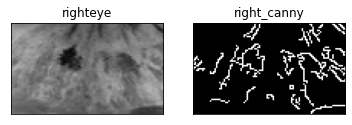

In [51]:
r_canny=cv2.Canny(img_roi,100,200)

titles=['righteye','right_canny']
images=[img_roi,r_canny]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

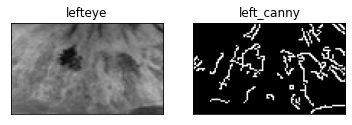

In [49]:
l_canny=cv2.Canny(pic_roi,100,200)
titles=['lefteye','left_canny']
images=[pic_roi,l_canny]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()